In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [5]:
df = pd.read_csv('SalaryData.csv')
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df.shape

(40, 3)

In [7]:
df.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

In [8]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [9]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [86]:
pip install bioinfokit


  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57086 sha256=8423a048e494ed49894e0823913463b1e1c851ea4b4ca84d14c7920de5ec0a5a
  Stored in directory: c:\users\bicky\appdata\local\pip\cache\wheels\14\de\74\be9ca0fd1c6ca5f583325daf4822f4371574f401cd37cfeb9e
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=04ba2704d13141a149238dc1ef31684754f67ab2e237fa786e461400ebd291a2
  Stored in directory: c:\users\bicky\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=691433e85da8f717ba5b96baea83be428c81970151a80f0c8c79fbe30101caba
  Stored in directory: c:\users\bicky\appdata\local\pip\cache\wheels\82\e4\64\dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built bioinfokit adjustText matplotlib-venn


In [87]:
from bioinfokit.analys import stat

In [65]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [11]:
#Formulation of hypothesis for conducting one-way ANOVA for education qualification w.r.t salary
#H0: Salary depend on education qualification 
#Ha: Salary does not depend on education
#Confidence level = 0.05
#Formulation of hypothesis for conducting one-way ANOVA for occupation w.r.t salary
#H0:Salary depend on occupation 
#Ha: Salary does not depend on occupation
#Confidence level = 0.05

In [11]:
formula= 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [12]:
formula1= 'Salary ~ C(Occupation)'
model1 = ols(formula1, df).fit()
aov_table1 = anova_lm(model1)
print(aov_table1)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [88]:
from bioinfokit.analys import stat

In [90]:
res = stat()
res.tukey_hsd(df=df, res_var='Salary', xfac_var='Education', anova_model='Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)')
res.tukey_summary

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


group1      group2           Diff          Lower          Upper  \
0   Doctorate   Bachelors   43274.066667   19610.644930   66937.488404   
1   Doctorate     HS-grad  133388.222222  105954.099557  160822.344888   
2   Bachelors     HS-grad   90114.155556   62352.775321  117875.535790   

     q-value  p-value  
0   6.385743    0.001  
1  16.978044    0.001  
2  11.334783    0.001

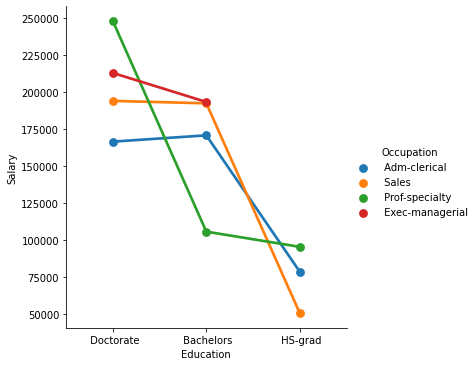

In [13]:
sns.catplot(x='Education',y='Salary',hue='Occupation',data=df,kind='point',ci=None)
plt.show()

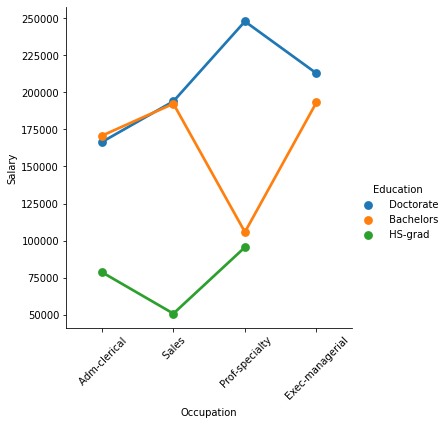

In [14]:
sns.catplot(x='Occupation',y='Salary',hue='Education',data=df,kind='point',ci=None)
plt.xticks(rotation=45)
plt.show()

In [15]:
formula2='Salary~C(Education)+C(Occupation)'
model2=ols(formula2,df).fit()
aov_table2=anova_lm(model2)
print(aov_table2)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


In [16]:
formula3='Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model3=ols(formula3,df).fit()
aov_table3=anova_lm(model3)
print(aov_table3)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [18]:
#Education Post 12th Standard.csv

In [17]:
class_12=pd.read_csv('Education Post 12th Standard.csv')
class_12.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [19]:
class_12.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [20]:
class_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [21]:
class_12.shape

(777, 18)

In [22]:
class_12.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [23]:
round(class_12.describe().T,2)

count      mean      std     min     25%     50%      75%  \
Apps         777.0   3001.64  3870.20    81.0   776.0  1558.0   3624.0   
Accept       777.0   2018.80  2451.11    72.0   604.0  1110.0   2424.0   
Enroll       777.0    779.97   929.18    35.0   242.0   434.0    902.0   
Top10perc    777.0     27.56    17.64     1.0    15.0    23.0     35.0   
Top25perc    777.0     55.80    19.80     9.0    41.0    54.0     69.0   
F.Undergrad  777.0   3699.91  4850.42   139.0   992.0  1707.0   4005.0   
P.Undergrad  777.0    855.30  1522.43     1.0    95.0   353.0    967.0   
Outstate     777.0  10440.67  4023.02  2340.0  7320.0  9990.0  12925.0   
Room.Board   777.0   4357.53  1096.70  1780.0  3597.0  4200.0   5050.0   
Books        777.0    549.38   165.11    96.0   470.0   500.0    600.0   
Personal     777.0   1340.64   677.07   250.0   850.0  1200.0   1700.0   
PhD          777.0     72.66    16.33     8.0    62.0    75.0     85.0   
Terminal     777.0     79.70    14.72    24.0    71.0    82.0     92.0   
S.F.Ratio    777.0     14.09     3.96     2.5    11.5    13.6     16.5   
perc.alumni  777.0     22.74    12.39     0.0    13.0    21.0     31.0   
Expend       777.0   9660.17  5221.77  3186.0  6751.0  8377.0  10830.0   
Grad.Rate    777.0     65.46    17.18    10.0    53.0    65.0     78.0   

                 max  
Apps         48094.0  
Accept       26330.0  
Enroll        6392.0  
Top10perc       96.0  
Top25perc      100.0  
F.Undergrad  31643.0  
P.Undergrad  21836.0  
Outstate     21700.0  
Room.Board    8124.0  
Books         2340.0  
Personal      6800.0  
PhD            103.0  
Terminal       100.0  
S.F.Ratio       39.8  
perc.alumni     64.0  
Expend       56233.0  
Grad.Rate      118.0

In [24]:
class_12.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [25]:
class_12.duplicated().sum()

0

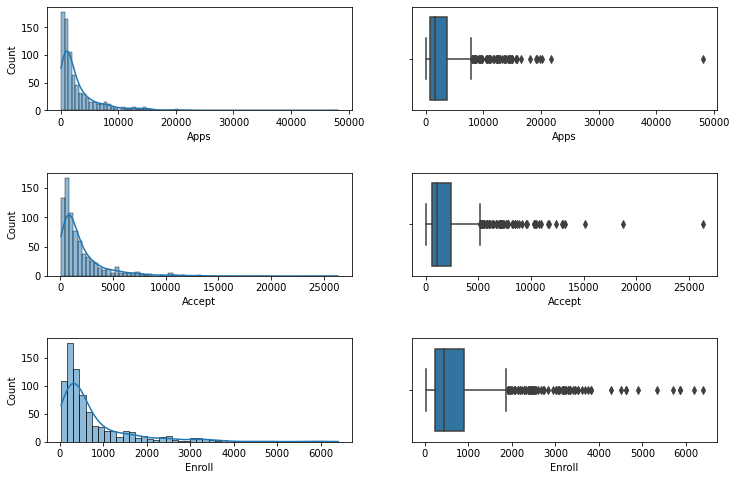

In [26]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(class_12['Apps'], kde=True, ax=axes[0][0])
sns.boxplot(x='Apps', data=class_12, ax=axes[0][1])
sns.histplot(class_12['Accept'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Accept', data=class_12 , ax=axes[1][1])
sns.histplot(class_12['Enroll'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Enroll', data=class_12 , ax=axes[2][1])
plt.subplots_adjust(hspace=0.6)

plt.show()

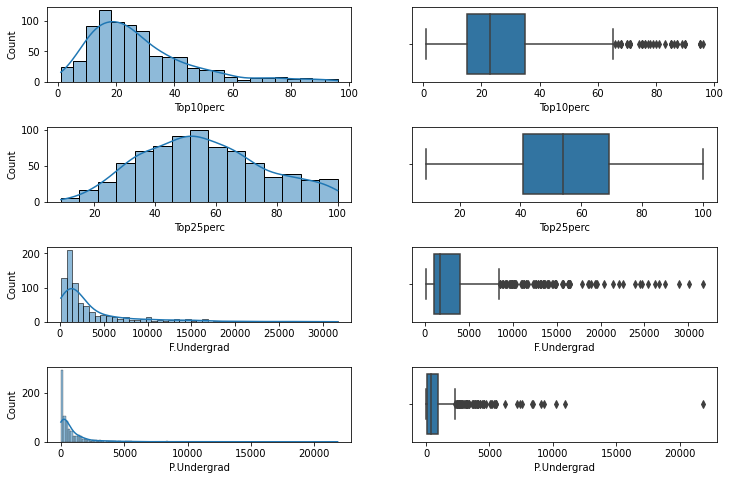

In [27]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(class_12['Top10perc'], kde=True, ax=axes[0][0])
sns.boxplot(x='Top10perc', data=class_12, ax=axes[0][1])
sns.histplot(class_12['Top25perc'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Top25perc', data=class_12 , ax=axes[1][1])
sns.histplot(class_12['F.Undergrad'] , kde=True, ax=axes[2][0])
sns.boxplot(x='F.Undergrad', data=class_12 , ax=axes[2][1])
sns.histplot(class_12['P.Undergrad'] , kde=True, ax=axes[3][0])
sns.boxplot(x='P.Undergrad', data=class_12 , ax=axes[3][1])
plt.subplots_adjust(hspace=0.6)

plt.show()

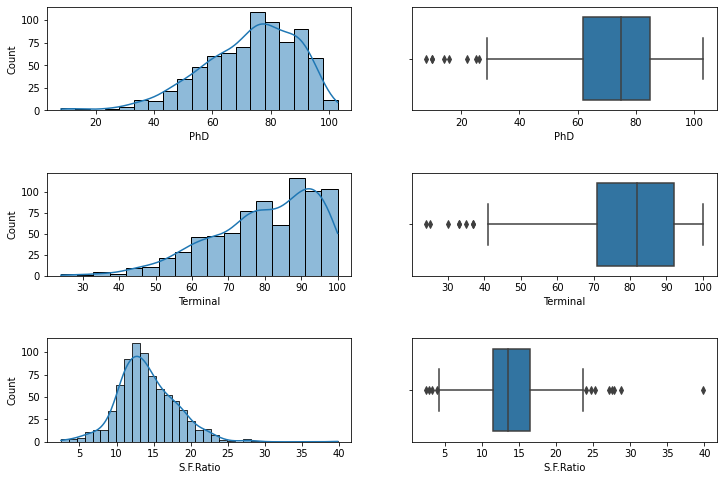

In [28]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(class_12['PhD'], kde=True, ax=axes[0][0])
sns.boxplot(x='PhD', data=class_12, ax=axes[0][1])
sns.histplot(class_12['Terminal'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Terminal', data=class_12 , ax=axes[1][1])
sns.histplot(class_12['S.F.Ratio'] , kde=True, ax=axes[2][0])
sns.boxplot(x='S.F.Ratio', data=class_12 , ax=axes[2][1])
plt.subplots_adjust(hspace=0.6)

plt.show()

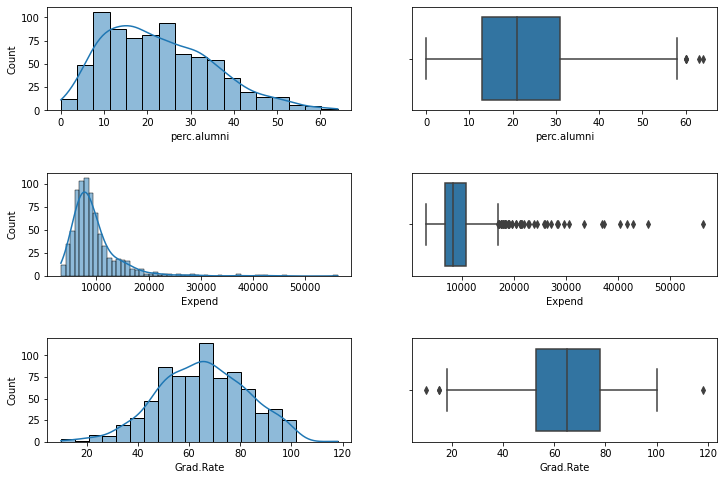

In [29]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(class_12['perc.alumni'], kde=True, ax=axes[0][0])
sns.boxplot(x='perc.alumni', data=class_12, ax=axes[0][1])
sns.histplot(class_12['Expend'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Expend', data=class_12 , ax=axes[1][1])
sns.histplot(class_12['Grad.Rate'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Grad.Rate', data=class_12 , ax=axes[2][1])
plt.subplots_adjust(hspace=0.6)

plt.show()

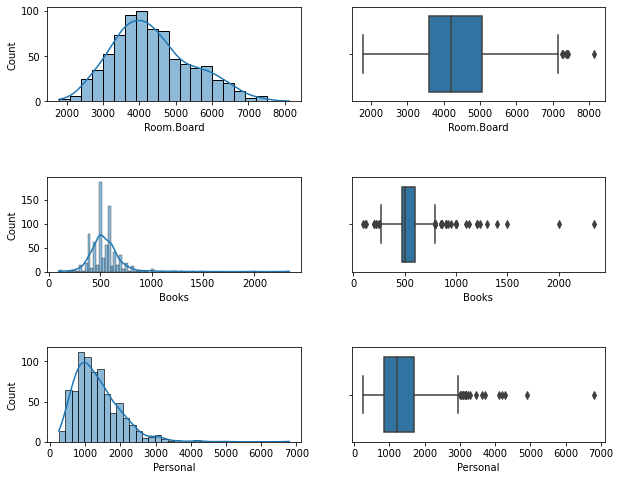

In [30]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(class_12['Room.Board'], kde=True, ax=axes[0][0])
sns.boxplot(x='Room.Board', data=class_12, ax=axes[0][1])
sns.histplot(class_12['Books'], kde=True, ax=axes[1][0])
sns.boxplot(x='Books', data=class_12, ax=axes[1][1])
sns.histplot(class_12['Personal'], kde=True, ax=axes[2][0])
sns.boxplot(x='Personal', data=class_12, ax=axes[2][1])
plt.subplots_adjust(hspace=0.8)
plt.show()

In [31]:
df2=class_12.copy()
df2.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [32]:
df2_num=df2.drop('Names',axis=1)
df2_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

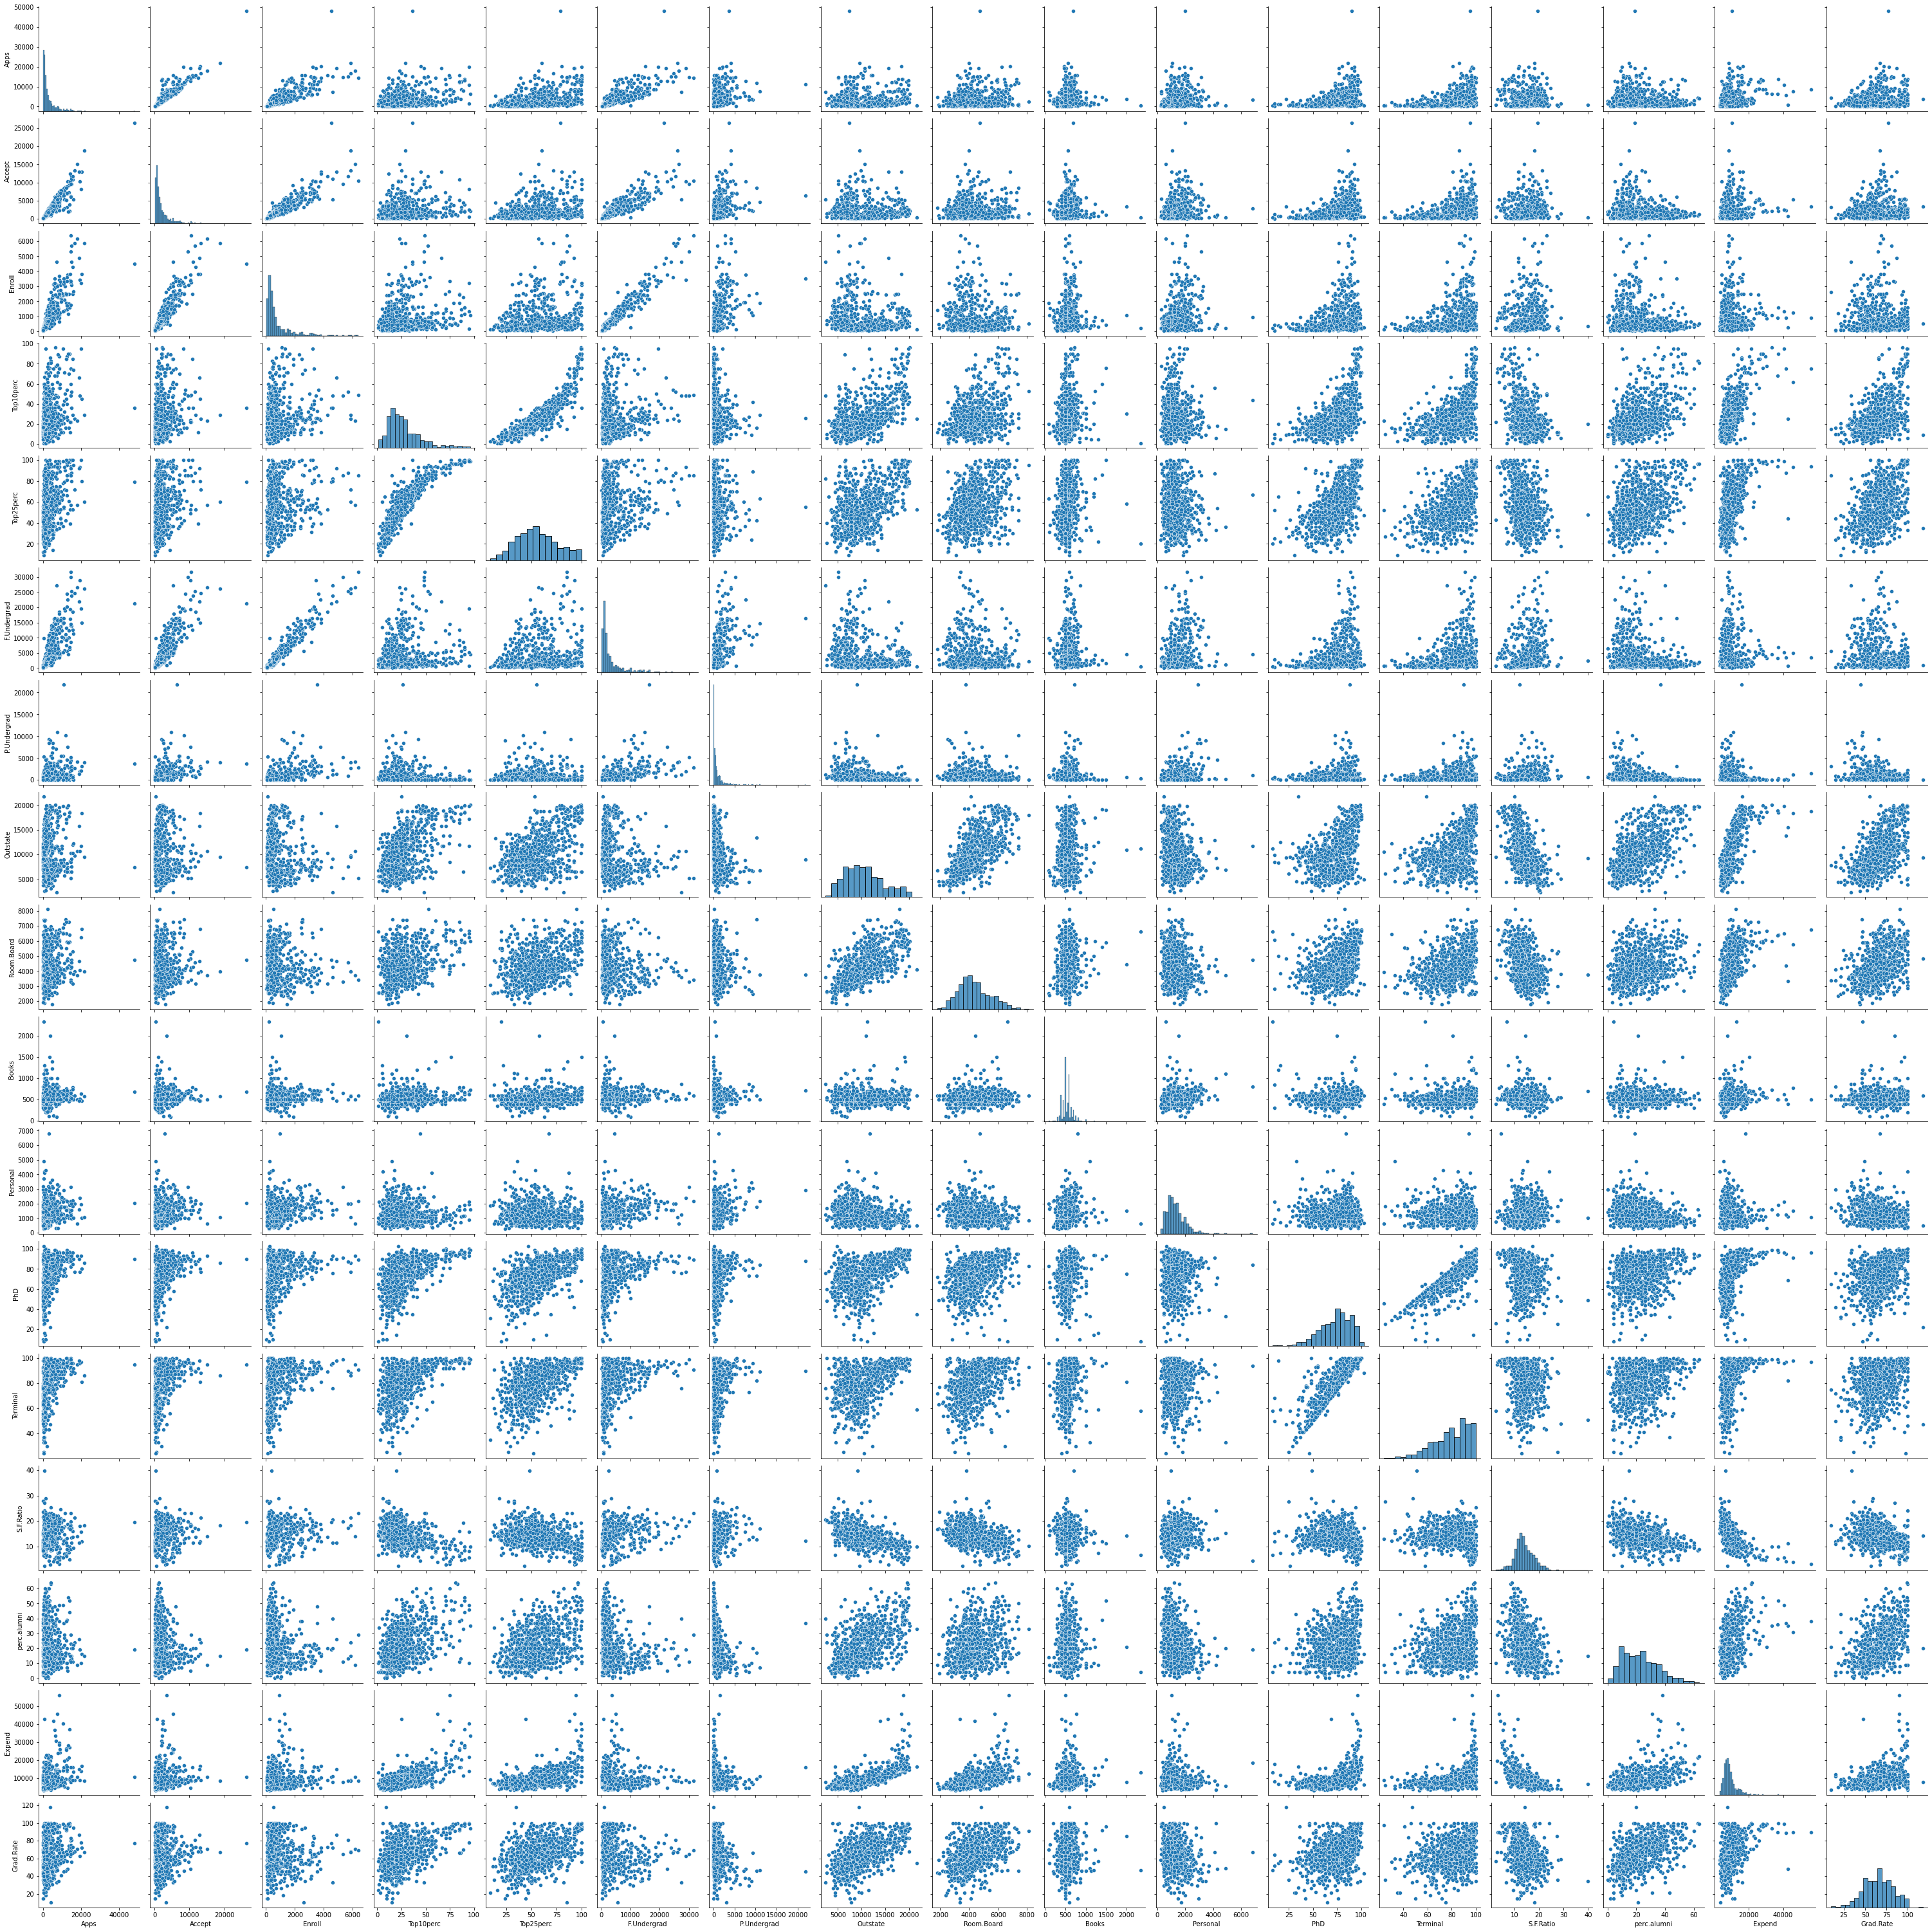

In [33]:
sns.pairplot(df2)

In [34]:
len(df2_num.columns)

17

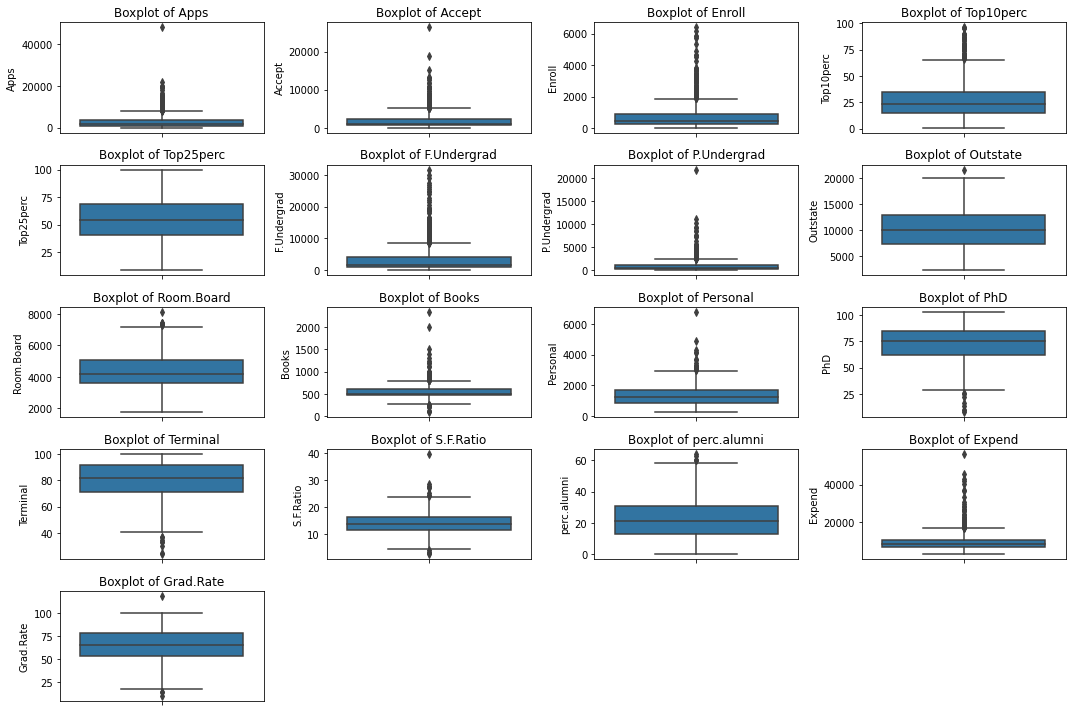

In [35]:
#Before Scaling
plt.figure(figsize = (15,10))
feature_list = df2_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df2_num[feature_list[i]], data = df2_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [36]:
#Scaling is important as all the factor given are in numeric form and the all columns have different units for its describtion.
#So to understand better we need to convert whole data to a single unitor scale.

In [37]:
from scipy.stats import zscore
class_12_scaled = df2_num.apply(zscore)

In [38]:
round(class_12_scaled.head(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0 -0.35   -0.32   -0.06      -0.26      -0.19        -0.17        -0.21   
1 -0.21   -0.04   -0.29      -0.66      -1.35        -0.21         0.24   
2 -0.41   -0.38   -0.48      -0.32      -0.29        -0.55        -0.50   
3 -0.67   -0.68   -0.69       1.84       1.68        -0.66        -0.52   
4 -0.73   -0.76   -0.78      -0.66      -0.60        -0.71         0.01   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0     -0.75       -0.96  -0.60      1.27 -0.16     -0.12       1.01   
1      0.46        1.91   1.22      0.24 -2.68     -3.38      -0.48   
2      0.20       -0.55  -0.91     -0.26 -1.20     -0.93      -0.30   
3      0.63        1.00  -0.60     -0.69  1.19      1.18      -1.62   
4     -0.72       -0.22   1.52      0.24  0.20     -0.52      -0.55   

   perc.alumni  Expend  Grad.Rate  
0        -0.87   -0.50      -0.32  
1        -0.54    0.17      -0.55  
2         0.59   -0.18      -0.67  
3         1.15    1.79      -0.38  
4        -1.68    0.24      -2.94

In [39]:
round(class_12_scaled.describe().T,2)

count  mean  std   min   25%   50%   75%    max
Apps         777.0   0.0  1.0 -0.76 -0.58 -0.37  0.16  11.66
Accept       777.0   0.0  1.0 -0.79 -0.58 -0.37  0.17   9.92
Enroll       777.0  -0.0  1.0 -0.80 -0.58 -0.37  0.13   6.04
Top10perc    777.0  -0.0  1.0 -1.51 -0.71 -0.26  0.42   3.88
Top25perc    777.0  -0.0  1.0 -2.36 -0.75 -0.09  0.67   2.23
F.Undergrad  777.0  -0.0  1.0 -0.73 -0.56 -0.41  0.06   5.76
P.Undergrad  777.0  -0.0  1.0 -0.56 -0.50 -0.33  0.07  13.79
Outstate     777.0   0.0  1.0 -2.01 -0.78 -0.11  0.62   2.80
Room.Board   777.0   0.0  1.0 -2.35 -0.69 -0.14  0.63   3.44
Books        777.0  -0.0  1.0 -2.75 -0.48 -0.30  0.31  10.85
Personal     777.0   0.0  1.0 -1.61 -0.73 -0.21  0.53   8.07
PhD          777.0   0.0  1.0 -3.96 -0.65  0.14  0.76   1.86
Terminal     777.0  -0.0  1.0 -3.79 -0.59  0.16  0.84   1.38
S.F.Ratio    777.0  -0.0  1.0 -2.93 -0.65 -0.12  0.61   6.50
perc.alumni  777.0  -0.0  1.0 -1.84 -0.79 -0.14  0.67   3.33
Expend       777.0   0.0  1.0 -1.24 -0.56 -0.25  0.22   8.92
Grad.Rate    777.0   0.0  1.0 -3.23 -0.73 -0.03  0.73   3.06

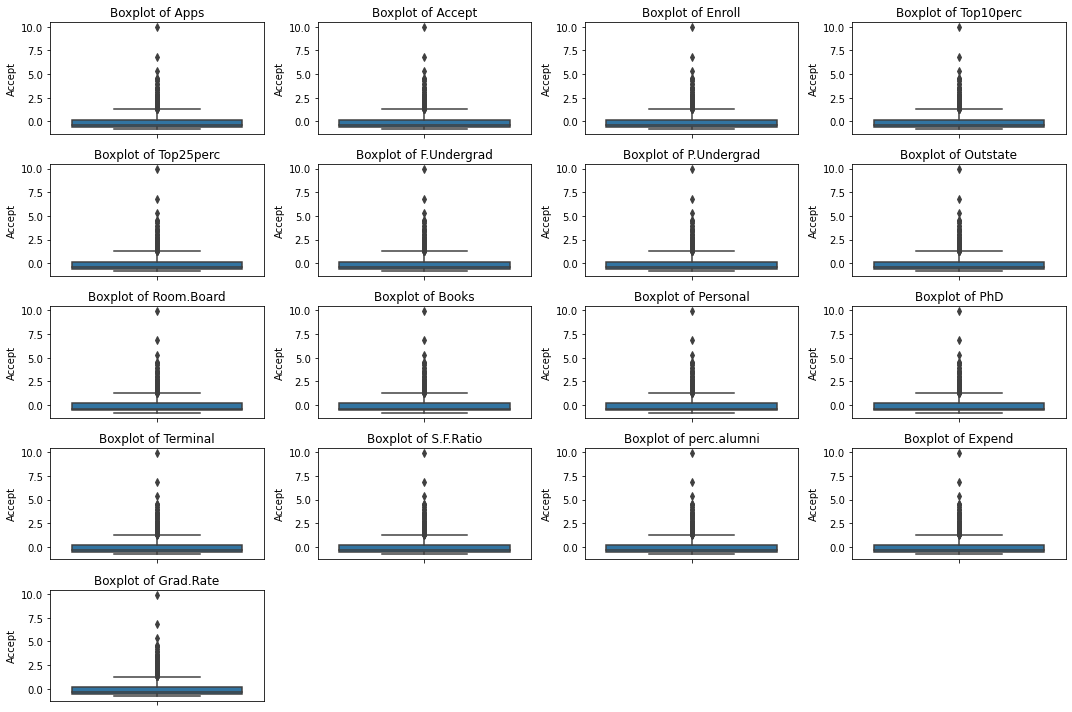

In [40]:
#After Scaling
plt.figure(figsize=(15,10))
feature_list2 = class_12_scaled.columns
for i in range(len(feature_list2)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = class_12_scaled[feature_list2[1]],data=class_12_scaled)
    plt.title('Boxplot of {}'.format(feature_list2[i]))
    plt.tight_layout()

In [41]:
cov=pd.DataFrame.cov(class_12)
round(cov,2)

Apps       Accept      Enroll  Top10perc  Top25perc  \
Apps         14978459.53   8949859.81  3045255.99   23132.77   26952.66   
Accept        8949859.81   6007959.70  2076267.76    8321.12   12013.40   
Enroll        3045255.99   2076267.76   863368.39    2971.58    4172.59   
Top10perc       23132.77      8321.12     2971.58     311.18     311.63   
Top25perc       26952.66     12013.40     4172.59     311.63     392.23   
F.Undergrad  15289702.47  10393582.44  4347529.88   12089.11   19158.95   
P.Undergrad   2346620.15   1646669.72   725790.67   -2829.47   -1615.41   
Outstate       780970.36   -253962.29  -581188.48   39907.18   38992.43   
Room.Board     700072.87    244347.15   -40997.06    7186.71    7199.90   
Books           84703.75     45942.81    17291.20     346.18     377.76   
Personal       468346.83    333556.63   176737.97   -1114.55   -1083.61   
PhD             24689.43     14238.20     5028.96     153.18     176.52   
Terminal        21053.07     12182.09     4217.09     127.55     153.00   
S.F.Ratio        1465.06      1709.84      872.68     -26.87     -23.10   
perc.alumni     -4327.12     -4859.49    -2081.69      99.57     102.55   
Expend        5246171.10   1596271.69   311345.43   60879.31   54546.48   
Grad.Rate        9756.42      2834.16     -356.59     149.99     162.37   

             F.Undergrad  P.Undergrad     Outstate  Room.Board     Books  \
Apps         15289702.47   2346620.15    780970.36   700072.87  84703.75   
Accept       10393582.44   1646669.72   -253962.29   244347.15  45942.81   
Enroll        4347529.88    725790.67   -581188.48   -40997.06  17291.20   
Top10perc       12089.11     -2829.47     39907.18     7186.71    346.18   
Top25perc       19158.95     -1615.41     38992.43     7199.90    377.76   
F.Undergrad  23526579.33   4212910.09  -4209843.04  -366458.22  92535.76   
P.Undergrad   4212910.09   2317798.85  -1552704.28  -102391.86  20410.45   
Outstate     -4209843.04  -1552704.28  16184661.63  2886597.39  25808.24   
Room.Board    -366458.22   -102391.86   2886597.39  1202743.03  23170.31   
Books           92535.76     20410.45     25808.24    23170.31  27259.78   
Personal      1041709.09    329732.43   -814673.72  -148083.77  20043.03   
PhD             25211.78      3706.76     25157.52     5895.03     72.53   
Terminal        21424.24      3180.60     24164.15     6047.30    242.96   
S.F.Ratio        5370.21      1401.30     -8835.25    -1574.21    -20.87   
perc.alumni    -13791.93     -5297.34     28229.55     3701.43    -82.26   
Expend         472403.96   -664351.15  14133235.71  2873308.48  96912.58   
Grad.Rate       -6563.31     -6721.06     39479.68     8005.36      3.01   

               Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
Apps          468346.83  24689.43  21053.07    1465.06     -4327.12   
Accept        333556.63  14238.20  12182.09    1709.84     -4859.49   
Enroll        176737.97   5028.96   4217.09     872.68     -2081.69   
Top10perc      -1114.55    153.18    127.55     -26.87        99.57   
Top25perc      -1083.61    176.52    153.00     -23.10       102.55   
F.Undergrad  1041709.09  25211.78  21424.24    5370.21    -13791.93   
P.Undergrad   329732.43   3706.76   3180.60    1401.30     -5297.34   
Outstate     -814673.72  25157.52  24164.15   -8835.25     28229.55   
Room.Board   -148083.77   5895.03   6047.30   -1574.21      3701.43   
Books          20043.03     72.53    242.96     -20.87       -82.26   
Personal      458425.75   -120.90   -305.15     365.42     -2399.31   
PhD             -120.90    266.61    204.23      -8.44        50.38   
Terminal        -305.15    204.23    216.75      -9.33        48.73   
S.F.Ratio        365.42     -8.44     -9.33      15.67       -19.76   
perc.alumni    -2399.31     50.38     48.73     -19.76       153.56   
Expend       -346097.80  36898.06  33733.46  -12067.56     27028.92   
Grad.Rate      -3132.61     85.56     73.22     -20.85       104.49   

                  Exp

In [42]:
round(class_12_scaled.corr(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.42   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.49  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.42  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

<AxesSubplot:>

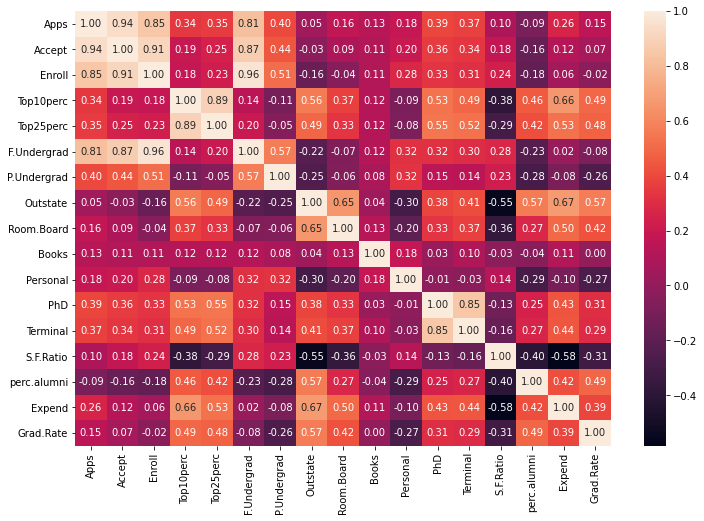

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(class_12_scaled.corr(),annot=True,fmt='.2f')

In [44]:
from factor_analyzer import FactorAnalyzer

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2_square_value,p_value=calculate_bartlett_sphericity(class_12_scaled)

In [46]:
p_value

0.0

In [48]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(class_12_scaled)
kmo_model

0.8131251200373515

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=17, random_state=123)
pca_transform=pca.fit_transform(class_12_scaled)

In [50]:
#Eigen Vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [51]:
#Eigen Values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [52]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [53]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

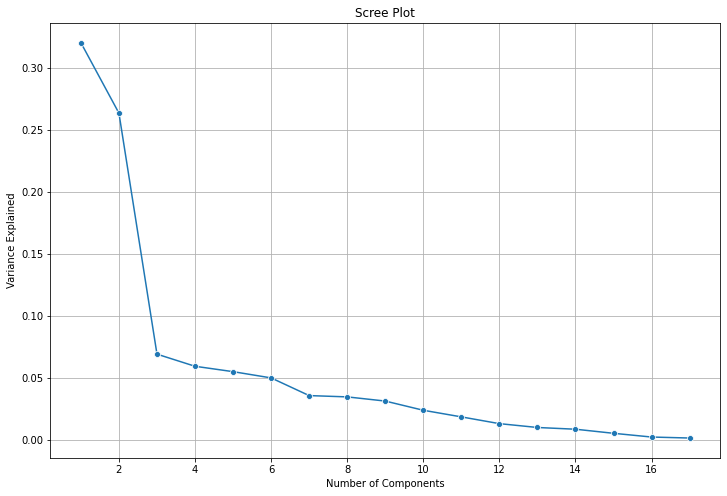

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(y=pca.explained_variance_ratio_ , x=range(1,18), marker='o')
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Variance Explained', fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [55]:
class_12_extract_loadings=pd.DataFrame(pca.components_.T,
                                      columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',
                                               'PC13','PC14','PC15','PC16','PC17'],
                                      index=class_12_scaled.columns)

In [56]:
round(class_12_extract_loadings,2)

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  \
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04 -0.10 -0.09  0.05  0.04   
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01 -0.06 -0.18  0.04 -0.06   
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06 -0.13  0.03 -0.07   
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16 -0.12  0.34  0.06 -0.01   
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10  0.40  0.01 -0.27   
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03  0.08 -0.06  0.02 -0.08   
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06  0.57  0.56 -0.22  0.10   
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01 -0.00  0.19  0.14   
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21 -0.22  0.28  0.30 -0.36   
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15  0.21 -0.13 -0.08  0.03   
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63 -0.23 -0.09  0.14 -0.02   
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08 -0.19 -0.12  0.04   
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03 -0.01 -0.25 -0.09 -0.06   
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08  0.27  0.47  0.45   
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68 -0.26  0.42 -0.13   
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23 -0.05 -0.05  0.13  0.69   
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22  0.56 -0.01  0.04 -0.59  0.22   

             PC12  PC13  PC14  PC15  PC16  PC17  
Apps         0.02  0.60  0.08  0.13  0.46  0.36  
Accept      -0.15  0.29  0.03 -0.15 -0.52 -0.54  
Enroll       0.01 -0.44 -0.09  0.03 -0.40  0.61  
Top10perc    0.04  0.00 -0.11  0.70 -0.15 -0.14  
Top25perc   -0.09  0.02  0.15 -0.62  0.05  0.08  
F.Undergrad  0.06 -0.52 -0.06  0.01  0.56 -0.41  
P.Undergrad -0.06  0.13  0.02  0.02 -0.05  0.01  
Outstate    -0.82 -0.14 -0.03  0.04  0.10  0.05  
Room.Board   0.35 -0.07 -0.06  0.00 -0.03  0.00  
Books       -0.03  0.01 -0.07 -0.01  0.00  0.00  
Personal    -0.04  0.04  0.03 -0.00 -0.01 -0.00  
PhD          0.02  0.13 -0.69 -0.11  0.03  0.01  
Terminal     0.02 -0.06  0.67  0.16 -0.03  0.01  
S.F.Ratio   -0.01 -0.02  0.04 -0.02 -0.02 -0.00  
perc.alumni  0.18  0.10 -0.03 -0.01  0.00 -0.02  
Expend       0.33 -0.09  0.07 -0.23 -0.04 -0.04  
Grad.Rate    0.12 -0.07  0.04 -0.00 -0.01 -0.01

In [57]:
class_12_select = class_12_extract_loadings[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]
round(class_12_select,2)

PC1   PC2   PC3   PC4   PC5   PC6   PC7
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22  0.56

In [58]:
pca = PCA(n_components=17, random_state=123)
pca_final = pca.fit_transform(class_12_scaled)

In [61]:
class_12_final=pd.DataFrame(pca_final, columns=class_12_extract_loadings.columns)
round(class_12_final.head(10),2)

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0 -1.59  0.77 -0.10 -0.92 -0.74 -0.30  0.64 -0.88  0.09  0.05  0.40 -0.09   
1 -2.19 -0.58  2.28  3.59  1.06 -0.18  0.24  0.05  1.11  0.97 -0.21  0.10   
2 -1.43 -1.09 -0.44  0.68 -0.37 -0.96 -0.25  0.31 -0.11  0.64 -0.15 -0.34   
3  2.86 -2.63  0.14 -1.30 -0.18 -1.06 -1.25 -0.15  0.38  0.46 -0.42  0.69   
4 -2.21  0.02  2.39 -1.11  0.68  0.00 -2.16 -0.62 -0.16  0.36 -0.15 -0.05   
5 -0.57 -1.50  0.02  0.07 -0.38 -0.67 -1.61 -0.53  0.26 -0.69 -0.10 -1.09   
6  0.24 -1.51  0.23 -1.14  1.55 -0.01  0.59 -0.33 -0.65  0.16 -0.60 -0.03   
7  1.75 -1.46 -1.03 -0.98  0.22  0.22  0.04  0.17 -0.35  0.34 -0.11 -0.10   
8  0.77 -1.98 -1.43 -0.07  0.59 -0.66 -0.21 -0.28  0.23 -0.63  0.23 -0.68   
9 -2.77 -0.84  1.63  1.71 -1.02 -0.79 -0.32 -0.16  0.23  0.11  0.15 -0.60   

   PC13  PC14  PC15  PC16  PC17  
0 -0.05  0.18  0.00 -0.09  0.09  
1 -0.24 -0.74  0.10 -0.05 -0.17  
2  0.10  0.23 -0.02 -0.00  0.00  
3 -0.08 -0.00 -0.07 -0.19 -0.18  
4  0.27 -0.61 -0.27  0.01  0.05  
5 -0.13 -0.09  0.22  0.06 -0.04  
6 -0.03 -0.25 -0.00  0.10  0.06  
7  0.03  0.26  0.01 -0.14 -0.05  
8 -0.22  0.04 -0.16  0.10  0.01  
9 -0.02 -0.45 -0.07  0.07 -0.05

In [62]:
class_12_final.shape

(777, 17)

In [63]:
round(class_12_final.iloc[0],2)

PC1    -1.59
PC2     0.77
PC3    -0.10
PC4    -0.92
PC5    -0.74
PC6    -0.30
PC7     0.64
PC8    -0.88
PC9     0.09
PC10    0.05
PC11    0.40
PC12   -0.09
PC13   -0.05
PC14    0.18
PC15    0.00
PC16   -0.09
PC17    0.09
Name: 0, dtype: float64